In [2]:
 # LINK GOOGLE DRIVE

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Imports
import numpy as np
import pandas as pd
from tqdm import tqdm  
import random
from sklearn.preprocessing import StandardScaler
%matplotlib inline               
import matplotlib.pyplot as plt

In [4]:
# Load the TLE data from drive
df = pd.read_csv("/content/drive/MyDrive/CS685_project/data/2019_tle_data.csv") 
df.drop(df.columns[0], axis=1, inplace=True)

In [5]:
df.head()

,OBJECT_NAME,NORAD_ID,YEAR LAUNCH,EPOCH,INCLINATION(i),RIGHT ASCENSION ASCENDING NODE(w),ECCENTRICITY(e),ARGUMENT PERIGEE(omega),FIRST DERIVATIVE MEAN MOTION(n_dot),SECOND DERIVATIVE MEAN MOTION(n_ddot),MEAN ANOMALY(M),MEAN MOTION(n),DRAG TERM(B*),REVOLUTION(rev),DEB_LABELS
0,0 VANGUARD 1,5,58002B,19062.547176,34.2423,241.7853,0.184549,28.9769,-9.700000e-07,0.0,340.1753,10.847785,-10.2480,40059,0
1,0 VANGUARD 1,5,58002B,19061.533962,34.2424,244.9073,0.184551,24.4163,-8.700000e-07,0.0,343.3658,10.847786,-9.1296,39950,0
2,0 VANGUARD 2,11,59001A,19062.810256,32.8692,26.0392,0.146831,109.0964,1.560000e-06,0.0,267.4040,11.856163,8.4707,89849,0
3,0 VANGUARD 2,11,59001A,19061.883760,32.8692,29.5172,0.146833,103.8659,1.500000e-06,0.0,272.9148,11.856160,8.2480,88729,0
4,0 VANGUARD 2,11,59001A,19060.957229,32.8691,32.9953,0.146835,98.6352,1.420000e-06,0.0,278.2792,11.856156,7.8769,87689,0


In [6]:
print("shape of data : ", df.shape[0])

shape of data :  6543689


In [7]:
scalar = StandardScaler()
scalar.fit(df.drop(['OBJECT_NAME', 'NORAD_ID', 'YEAR LAUNCH', 'EPOCH','DEB_LABELS'], axis=1))
scaled_features = scalar.transform(df.drop(['OBJECT_NAME', 'NORAD_ID', 'YEAR LAUNCH', 'EPOCH','DEB_LABELS'], axis=1))


df_standardized = pd.DataFrame(scaled_features, columns=df.columns[4:-1])
df_standardized.head()

,INCLINATION(i),RIGHT ASCENSION ASCENDING NODE(w),ECCENTRICITY(e),ARGUMENT PERIGEE(omega),FIRST DERIVATIVE MEAN MOTION(n_dot),SECOND DERIVATIVE MEAN MOTION(n_ddot),MEAN ANOMALY(M),MEAN MOTION(n),DRAG TERM(B*),REVOLUTION(rev)
0,-1.139129,0.597003,0.797830,-1.395398,-0.005684,-0.010214,1.445475,-0.125293,-0.014096,-0.087096
1,-1.139126,0.625838,0.797840,-1.438950,-0.005683,-0.010214,1.475081,-0.125293,-0.013766,-0.090506
2,-1.181341,-1.395677,0.566061,-0.630292,-0.005647,-0.010214,0.770208,0.072053,-0.008568,1.470416
3,-1.181341,-1.363553,0.566070,-0.680241,-0.005647,-0.010214,0.821345,0.072053,-0.008634,1.435381
4,-1.181345,-1.331428,0.566081,-0.730192,-0.005649,-0.010214,0.871123,0.072052,-0.008743,1.402848


In [8]:
inclination_standardized_sat = []
raan_standardized_sat = []
ecc_standardized_sat = []
arg_per_standardized_sat = []
n_dot_standardized_sat = []
n_ddot_standardized_sat = []
mean_anamoly_standardized_sat = []
mean_motion_standardized_sat = []
drag_standardized_sat = []
rev_standardized_sat = []


inclination_standardized_deb = []
raan_standardized_deb = []
ecc_standardized_deb = []
arg_per_standardized_deb = []
n_dot_standardized_deb = []
n_ddot_standardized_deb = []
mean_anamoly_standardized_deb = []
mean_motion_standardized_deb = []
drag_standardized_deb = []
rev_standardized_deb = []

In [9]:
for i in tqdm(range(df.shape[0])):
    #print(df['DEB_LABELS'][i])
    if df['DEB_LABELS'][i] == 0:
        #print('sat')
        inclination_standardized_sat.append(df_standardized['INCLINATION(i)'][i])
        raan_standardized_sat.append(df_standardized['RIGHT ASCENSION ASCENDING NODE(w)'][i])
        ecc_standardized_sat.append(df_standardized['ECCENTRICITY(e)'][i])
        arg_per_standardized_sat.append(df_standardized['ARGUMENT PERIGEE(omega)'][i])
        n_dot_standardized_sat.append(df_standardized['FIRST DERIVATIVE MEAN MOTION(n_dot)'][i])
        n_ddot_standardized_sat.append(df_standardized['SECOND DERIVATIVE MEAN MOTION(n_ddot)'][i])
        mean_anamoly_standardized_sat.append(df_standardized['MEAN ANOMALY(M)'][i])
        mean_motion_standardized_sat.append(df_standardized['MEAN MOTION(n)'][i])
        drag_standardized_sat.append(df_standardized['DRAG TERM(B*)'][i])
        rev_standardized_sat.append(df_standardized['REVOLUTION(rev)'][i])
    if df['DEB_LABELS'][i] == 1:
        #print('deb')
        inclination_standardized_deb.append(df_standardized['INCLINATION(i)'][i])
        raan_standardized_deb.append(df_standardized['RIGHT ASCENSION ASCENDING NODE(w)'][i])
        ecc_standardized_deb.append(df_standardized['ECCENTRICITY(e)'][i])
        arg_per_standardized_deb.append(df_standardized['ARGUMENT PERIGEE(omega)'][i])
        n_dot_standardized_deb.append(df_standardized['FIRST DERIVATIVE MEAN MOTION(n_dot)'][i])
        n_ddot_standardized_deb.append(df_standardized['SECOND DERIVATIVE MEAN MOTION(n_ddot)'][i])
        mean_anamoly_standardized_deb.append(df_standardized['MEAN ANOMALY(M)'][i])
        mean_motion_standardized_deb.append(df_standardized['MEAN MOTION(n)'][i])
        drag_standardized_deb.append(df_standardized['DRAG TERM(B*)'][i])
        rev_standardized_deb.append(df_standardized['REVOLUTION(rev)'][i])


100%|██████████| 6543689/6543689 [09:12<00:00, 11852.79it/s]


In [37]:
#number_of_samples
n = 200000

index_list = list(np.arange(0, 300000))
index_samples = random.sample(index_list, n)

In [39]:
inclination_plot_sat = [inclination_standardized_sat[i] for i in index_samples]
raan_plot_sat = [raan_standardized_sat[i] for i in index_samples]
ecc_plot_sat = [ecc_standardized_sat[i] for i in index_samples]

inclination_plot_deb = [inclination_standardized_deb[i] for i in index_samples]
raan_plot_deb = [raan_standardized_deb[i] for i in index_samples]
ecc_plot_deb = [ecc_standardized_deb[i] for i in index_samples]


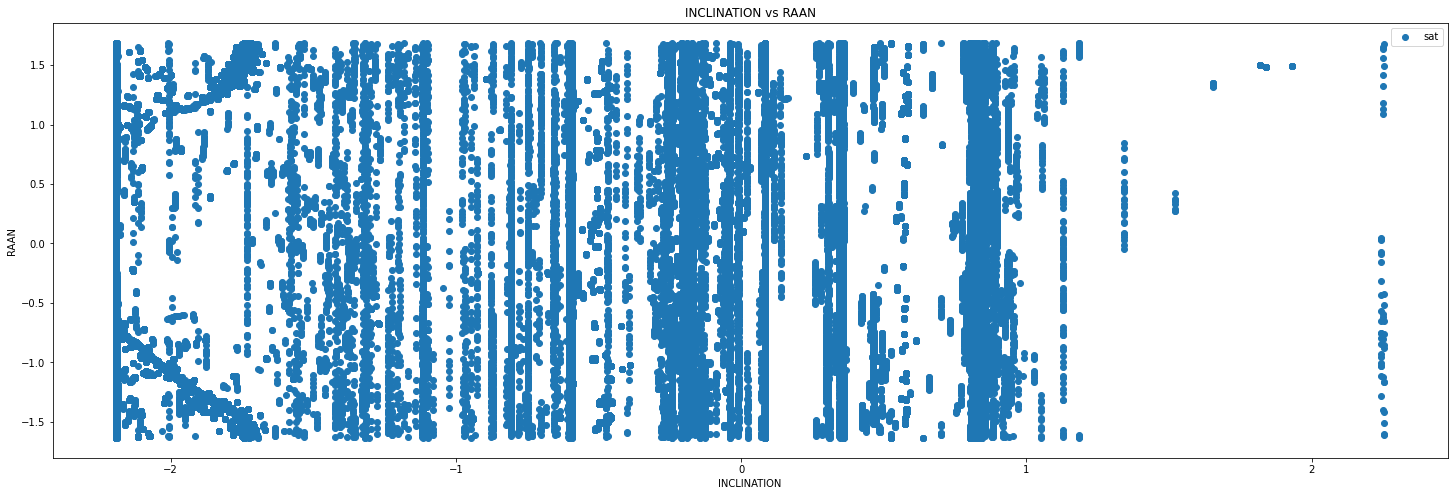

In [26]:
plt.rcParams["figure.figsize"] = (25,8)

plt.scatter(inclination_plot_sat, raan_plot_sat, label='sat')
#plt.scatter(inclination_plot_deb, raan_plot_deb, label='deb')
plt.xlabel('INCLINATION')
plt.ylabel('RAAN')
plt.title('INCLINATION vs RAAN')
plt.legend()
plt.show()

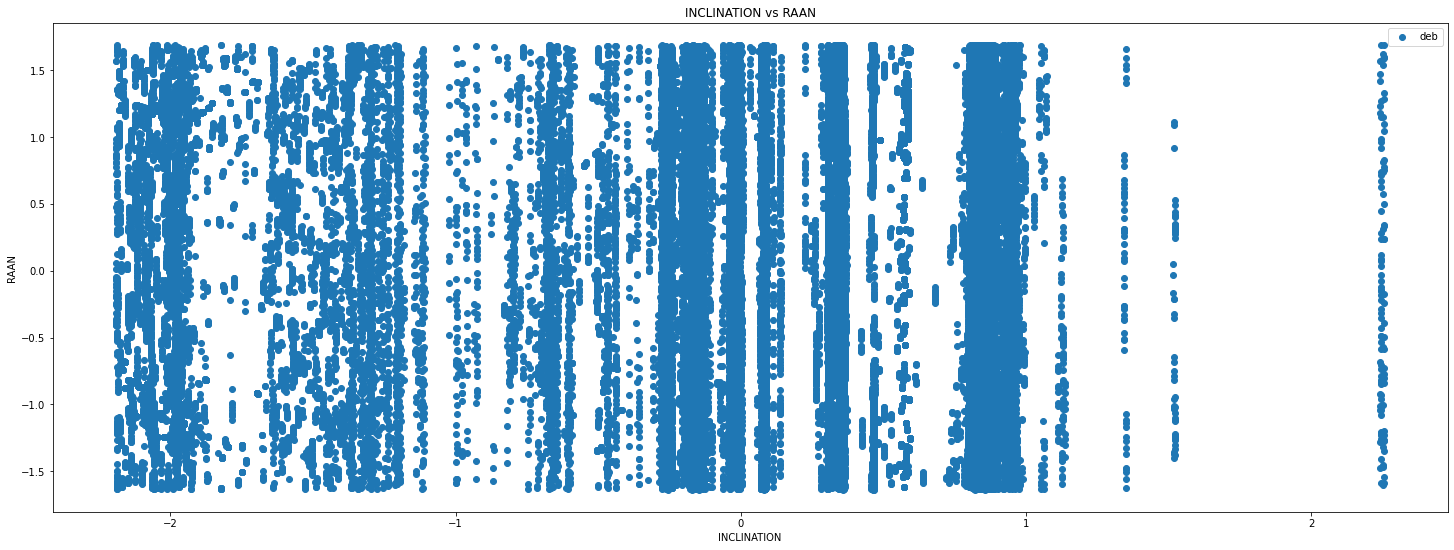

In [25]:
plt.rcParams["figure.figsize"] = (25,9)

#plt.scatter(random.sample(inclination_standardized_sat,n), random.sample(ecc_standardized_sat,n), label='sat')
plt.scatter(inclination_plot_deb, raan_plot_deb, label='deb')
plt.xlabel('INCLINATION')
plt.ylabel('RAAN')
plt.title('INCLINATION vs RAAN')
plt.legend()
plt.show()

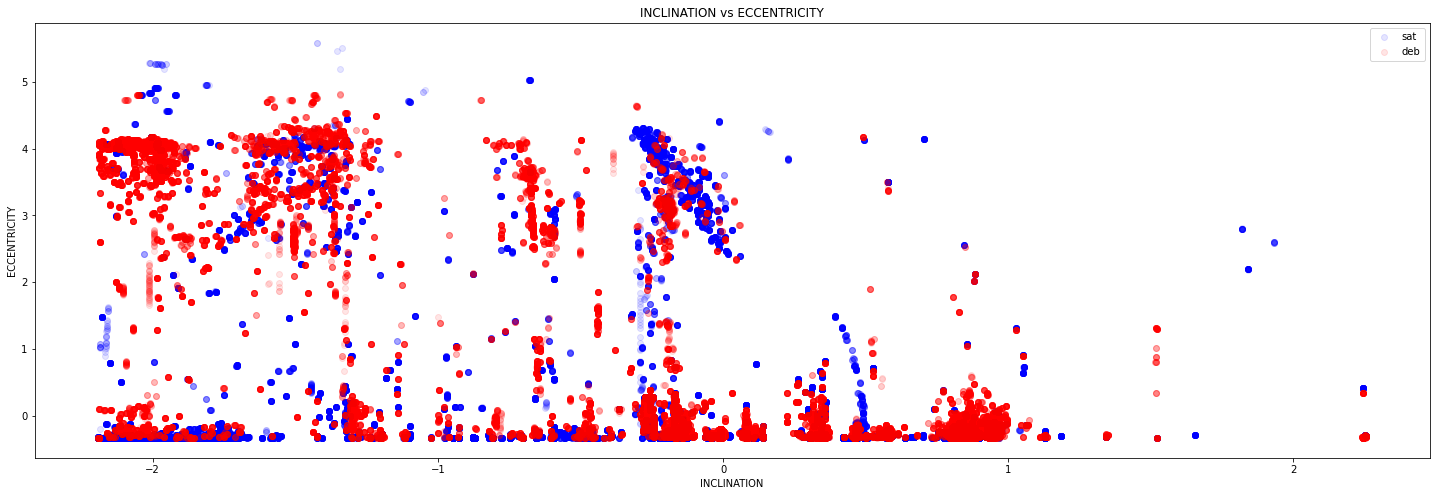

In [44]:
plt.rcParams["figure.figsize"] = (25,8)

plt.scatter(inclination_plot_sat, ecc_plot_sat, label='sat', lw=1, alpha=0.1, color='blue')
plt.scatter(inclination_plot_deb, ecc_plot_deb, label='deb', lw=1, alpha=0.1, color='red')
plt.xlabel('INCLINATION')
plt.ylabel('ECCENTRICITY')
plt.title('INCLINATION vs ECCENTRICITY')
plt.legend()
plt.show()

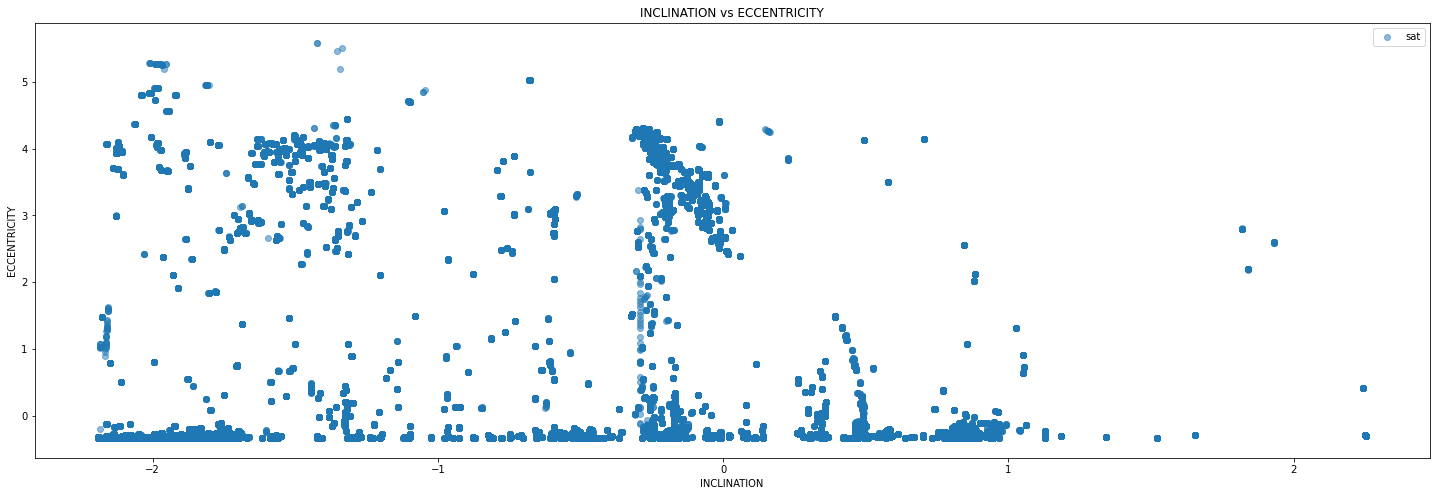

In [40]:
plt.rcParams["figure.figsize"] = (25,8)

plt.scatter(inclination_plot_sat, ecc_plot_sat, label='sat', lw=1, alpha=0.5)
#plt.scatter(inclination_plot_deb, ecc_plot_deb, label='deb', lw=1, alpha=0.5, colour='red')
plt.xlabel('INCLINATION')
plt.ylabel('ECCENTRICITY')
plt.title('INCLINATION vs ECCENTRICITY')
plt.legend()
plt.show()